##Q 1. What is Boosting in Machine Learning?
**Ans** -  Boosting is an ensemble learning technique in machine learning that combines multiple weak learners to form a strong learner.

**Meaning**
* A weak learner is a model that performs slightly better than random guessing.
* Boosting sequentially trains these weak learners so that each new model focuses on the errors made by the previous ones.
* The final prediction is a weighted combination of all the weak learners.

**Working of Boosting**
1. Start with a weak model.
2. Calculate the errors.
3. Train the next model to fix those errors.
4. Repeat this process multiple times.
5. Combine the outputs of all models for the final prediction.

**Popular Boosting Algorithms**

|Algorithm	|Description|
|-||
|AdaBoost	|Adjusts the weights of incorrectly classified instances.|
|Gradient Boosting	|Optimizes a loss function using gradient descent.|
|XGBoost	|Fast and regularized version of gradient boosting.|
|LightGBM	|Boosting using histogram-based learning; faster on large datasets.|
|CatBoost	|Handles categorical features automatically and efficiently.|

**Advantages**
* High accuracy.
* Reduces bias and variance.
* Works well with structured/tabular data.

**Disadvantages**
* Can overfit if not tuned properly.
* Computationally expensive.

##Q 2.  How does Boosting differ from Bagging?
**Ans** - Boosting and Bagging are both ensemble learning techniques, but they work in fundamentally different ways.

**Main Difference**

|Feature	|Bagging (Bootstrap Aggregating)	|Boosting|
|-|||
|Goal	|Reduce variance (overfitting)	|Reduce bias (underfitting)|
|Learners	|Trained independently	|Trained sequentially|
|Data Sampling	|Uses random subsets with replacement	|Each new model focuses on previous errors|
|Combination	|Aggregates (e.g., average or majority vote)	|Weighted sum of models|
|Examples	|Random Forest	|AdaBoost, Gradient Boosting, XGBoost|

**Concepts**
* Bagging:
  * Trains many decision trees on different random samples.
  * Each model votes or contributes equally.
  * Great at handling high variance.
* Boosting:
  * Models are trained in sequence, with each trying to correct the errors of the previous.
  * Later models get more weight on difficult cases.
  * Good at reducing bias and improving accuracy.

**When to Use**

|Situation	|Better Choice|
|-||
|High variance, overfitting	|Bagging|
|High bias, underfitting	|Boosting|
|Very large datasets with noise	|Bagging (more stable)|
|Clean, structured data	|Boosting (more accurate)|

##Q 3. What is the key idea behind AdaBoost?
**Ans** - The key idea behind AdaBoost is to combine multiple weak learners into a single strong learner by focusing more on the mistakes made by previous models.

**Concept**
* AdaBoost trains models sequentially.
* It adjusts the weights of the training samples:
  * Samples that are misclassified get higher weight.
  * Samples that are correctly classified get lower weight.
* The next weak learner focuses more on the hard-to-classify examples.

**AdaBoost Working**
1. Initialize weights equally for all training data.
2. Train a weak learner on the weighted dataset.
3. Measure error:
  * Find which data points the model got wrong.
4. Update weights:
  * Increase weights for wrong predictions.
  * Decrease weights for correct ones.
5. Repeat the process for several rounds.
6. Final prediction is a weighted vote of all weak learners.

**AdaBoost Formula Insight**
* After each iteration, AdaBoost assigns a model weight (α) based on the model's accuracy.

* Final prediction:

      Final Output = sign(∑aₜ⋅hₜ(x))
Where aₜ is the weight for model t, and hₜ(x) is the prediction.

**Advantages**
* Simple to implement.
* Often better performance than a single strong model.
* Automatically focuses on hard examples.

**Disadvantages**
* Sensitive to noisy data and outliers.
* Slower on large datasets.

##Q 4. Explain the working of AdaBoost with an example?
**Ans** - **Let's assume a Problem** -
We want to classify whether an email is spam or not spam using AdaBoost.

we have a small dataset:

|Email	|Feature: Contains "Offer"	|Label (Y)|
|-|||
|A	|Yes (1)	|Spam (+1)|
|B	|No (0)	|Not Spam (-1)|
|C	|Yes (1)	|Spam (+1)|
|D	|No (0)	|Not Spam (-1)|

We'll use decision stumps as weak learners.

**Step-by-step AdaBoost**

Step 1: Initialize Weights

Each sample gets an equal weight:

    𝑤ᵢ = 1/4 = 0.25 for all 4 emails

Step 2: Train First Weak Learner

Suppose the first weak learner is:

Rule: If email contains "Offer", then label as Spam (+1); else Not Spam (-1)

This rule correctly classifies all examples — great!
* Email A → Spam
* Email B → Not Spam
* Email C → Spam
* Email D → Not Spam

Error = 0 (since all are correct)

Step 3: Compute Learner's Weight (α₁)

    𝛼₁ = (1/2)ln((1 − error)/error)
But since error is 0, this becomes infinite - in practice, we avoid such cases by limiting
α, or skipping perfect learners.

Let's adjust the example:

Assume our first weak learner misclassifies Email D (predicts Spam, but it's Not Spam):

So, only Email D is wrong.

    Error = 𝑤D = 0.25
    α₁ = (1/2)ln((1−0.25)/0.25) = (1/2)ln(3) ≈ 0.55
Step 4: Update Weights

We increase weight for the wrongly classified Email D:
* New weights:
  * Correct predictions → weights decrease
  * Wrong prediction (Email D) → weight increases

Formula:

    𝑤ᵢ ← 𝑤ᵢ⋅𝑒^(⁻a⋅yᵢ⋅h(xᵢ))

Then normalize all weights so they sum to 1.

Result: Email D gets higher importance in next round.

Step 5: Train Next Weak Learner

Now the next weak learner is trained on the updated weights, paying more attention to Email D.

Maybe this time, it uses a different rule to classify Email D correctly.

Final Prediction
Each weak learner gets a vote weighted by its α.
The final prediction is a weighted sum of all weak learners' predictions:

    Final Output = sign(∑aₜ⋅hₜ(x))

##Q 5. What is Gradient Boosting, and how is it different from AdaBoost?
**Ans** - Both Gradient Boosting and AdaBoost are Boosting techniques in machine learning, but they differ in how they improve model performance over iterations.

**Gradient Boosting**

Gradient Boosting is a boosting algorithm that builds models sequentially, like AdaBoost — but it does so by minimizing a loss function using gradient descent.

Each new model is trained to predict the residual errors made by the previous model. Instead of focusing on misclassified samples, it focuses on how wrong the previous model was.

**Gradient Boosting Working**
1. Start with an initial prediction (e.g., mean value for regression).
2. Compute the loss (e.g., MSE for regression or log-loss for classification).
3. Calculate the residuals.
4. Train a weak learner (e.g., small decision tree) to fit the residuals.
5. Update the model by adding the new learner with a learning rate.
6. Repeat steps 2-5 for a fixed number of rounds or until convergence.

**Gradient Boosting vs. AdaBoost**

|Feature	|AdaBoost	|Gradient Boosting|
|-|||
|Error Handling	|Focuses on misclassified samples	|Focuses on residual errors (gradients)|
|Weighting Strategy	|Updates sample weights	|Uses gradients of the loss function|
|Loss Function	|Mainly uses exponential loss	|Can use any differentiable loss function|
|Flexibility	|Less flexible (tied to classification)	|More flexible (used for classification & regression)|
|Robustness	|Less robust to noise	|More robust (can use regularization, shrinkage)|

**Analogy**
* AdaBoost: "Let's give more attention to the students who failed the last test."
* Gradient Boosting: "Let's figure out how far each student was from the correct answer, and correct that."

##Q 6. What is the loss function in Gradient Boosting?
**Ans** - The loss function in Gradient Boosting is a key component — it defines how the model learns by measuring how wrong the predictions are, and guides the algorithm to improve.

**Loss Function**

A loss function quantifies the difference between the true values and the predicted values.
In Gradient Boosting, the algorithm minimizes this loss function by training each new weak learner to correct the errors from the previous model.

**Loss Function Working in Gradient Boosting**
1. Initialize the model with a constant prediction.
2. For each iteration:
  * Compute the negative gradient of the loss.
  * Train a weak learner on these residuals.
  * Update the model by adding the predictions of the new learner, scaled by a learning rate.

**Common Loss Functions in Gradient Boosting:**

|Task	|Loss Function	|Formula|
|-|||
|Regression	|Mean Squared Error|L = 1/n∑(y-ŷ )²|
||Mean Absolute Error	|(L = \frac{1}{n}\sum|
||Huber Loss(robust to outliers)	|Combines MSE and MAE|
|Binary Classification	|Log Loss/Cross-Entropy|L = -[ylog(ŷ)+(1-y)log(1-ŷ)]|
|Multi-Class Classification	|Softmax with Cross-Entropy	|Extension of binary log loss|

##Q 7. How does XGBoost improve over traditional Gradient Boosting?
**Ans** - XGBoost is a powerful, optimized version of traditional Gradient Boosting, and it's widely used in machine learning competitions and real-world applications because of its speed and performance.

**XGBoost Improves Over Traditional Gradient Boosting**

|Improvement Area	|XGBoost Feature|
|-||
|Speed & Efficiency	|Uses parallelization, cache awareness, and out-of-core computation (for large data).|
|Better Trees	|Uses regularized trees (with pruning) instead of simple greedy trees.|
|Regularization	|Adds L1 & L2 regularization to reduce overfitting (like Ridge/Lasso).|
|Handling Missing Values	|Automatically learns the best direction to take when data is missing.|
|Sparse Aware	|Efficient with sparse datasets (e.g., one-hot encoded data).|
|Approximate Algorithms	|Uses histogram-based algorithms for faster split finding.|
|Weighted Quantile Sketch	|Efficiently handles large datasets when computing tree splits.|
|Early Stopping	|Stops training when validation performance stops improving.|
|Cross-validation |Built-in	You can perform CV within the training loop.|
|Scalable & Portable	|Supports distributed computing and multiple languages (Python, R, Java, Scala, etc.).|

**Technical Enhancements in XGBoost**
1. Objective Function with Regularization

        Obj = ∑ᵢ l(yᵢ,ŷᵢ)+∑ₖ Ω(fₖ)
Where:
* l = loss function (e.g., MSE, log loss)
* Ω(f) = 𝛾T+(1/2)𝜆||w||²
(Regularization on number of leaves and leaf weights)

**2. Second-Order Approximation**

Instead of just using gradients, XGBoost uses a 2nd-order Taylor expansion of the loss function for better accuracy and optimization.

**3. Pruning Instead of Pre-Stopping**

Traditional Gradient Boosting grows trees until a stopping condition is met.
XGBoost grows trees deep, then prunes back the parts that don't improve the objective.

##Q 8. What is the difference between XGBoost and CatBoost?
**Ans** - Both XGBoost and CatBoost are boosting algorithms based on Gradient Boosting, but they differ in how they handle features, speed, ease of use, and performance on categorical data.

**XGBoost vs. CatBoost — Side-by-Side Comparison**

|Feature	|XGBoost	|CatBoost|
|-|||
|Core Algorithm	|Gradient Boosting with 2nd-order info	|Gradient Boosting with ordered boosting|
|Categorical Feature Handling	|Needs manual encoding (e.g., one-hot, label encoding)	|Automatically handles categorical features|
|Missing Values Handling	|Automatically handled	|Automatically handled|
|Regularization	|L1 & L2 (like Lasso/Ridge)	|Also uses L2 and supports overfitting control|
|Training Speed	|Very fast (especially with histogram-based)	|Also fast, but slightly slower than XGBoost in some cases|
|Numerical Stability	|Stable	|Stable|
|Accuracy (especially with categorical data)	|Good	|Often better, especially on datasets with many categorical features|
|Ease of Use	|Needs preprocessing	|Minimal preprocessing|
|Language Support	|Python, R, Java, Scala, etc.	|Python, R, C++, Java|
|Documentation	|Extensive and mature	|Good, improving rapidly|
|Interpretability Tools	|Built-in feature importance	|Also provides feature importance, visualizations|
|Cross-validation support	|Yes	|Yes|

**Differences**
1. Categorical Features
* XGBoost requires us to manually encode categorical variables.
* CatBoost automatically detects and processes categorical features using ordered statistics, avoiding data leakage.

2. Ordered Boosting in CatBoost
* CatBoost introduces ordered boosting, which prevents prediction shift.
* This makes it more stable and accurate, especially with small datasets.

3. Handling of Overfitting
* Both use regularization, but CatBoost's use of random permutations and ordered boosting gives it better control over overfitting.

**When to Use**

|Scenario	|Go For|
|-||
|Data has many categorical features	|CatBoost|
|You need maximum control over training params	|XGBoost|
|Speed is most critical	|XGBoost|
|You want minimal preprocessing	|CatBoost|
|Your team already uses sklearn-style tools	|XGBoost|

##Q 9. What are some real-world applications of Boosting techniques?
**Ans** - Boosting techniques like AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost are used in a wide range of real-world applications where high predictive accuracy is important.

**Real-World Applications of Boosting**
1. Fraud Detection
  * Industry: Banking, FinTech, Insurance
  * Use: Detect suspicious transactions, insurance fraud.
  * Why Boosting?: Boosting handles imbalanced data and rare patterns well.

2. Customer Churn Prediction
  * Industry: Telecom, SaaS, Retail
  * Use: Predict which customers are likely to leave a service.
  * Why Boosting?: Excellent at picking up subtle signals from behavior patterns.

3. Credit Scoring
  * Industry: Finance, Lending
  * Use: Predict creditworthiness of applicants.
  * Why Boosting?: High accuracy and handles mixed data types.

4. Medical Diagnosis & Risk Prediction
  * Industry: Healthcare
  * Use: Predict disease risk, patient readmission.
  * Why Boosting?: Delivers strong accuracy, especially on tabular clinical data.

5. Loan Default Prediction
  * Industry: Banking, Microfinance
  * Use: Predict whether a borrower will repay a loan.
  * Why Boosting?: Great at identifying nonlinear patterns and interactions.

6. Stock Market Prediction & Algorithmic Trading
  * Industry: Finance
  * Use: Forecast trends, detect anomalies, trading signals.
  * Why Boosting?: Can process complex time-series features with good performance.

7. Product Recommendation & Personalization
  * Industry: E-commerce, Media, Streaming
  * Use: Recommend products/movies/music based on user behavior.
  * Why Boosting?: Captures user-item interactions effectively when trained on historical data.

8. Spam Detection & Email Classification
  * Industry: IT, Cybersecurity
  * Use: Classify messages as spam or not, prioritize emails.
  * Why Boosting?: Boosted models handle noisy data well and are resistant to small changes.

9. Sentiment Analysis & NLP Tasks
  * Industry: Social Media, Marketing
  * Use: Determine if customer reviews are positive, negative, or neutral.
  * Why Boosting?: With proper text feature extraction, it competes with deep learning on structured data.

10. Self-Driving Cars
  * Industry: Automotive
  * Use: Predict object location, classify road signs, detect pedestrians.
  * Why Boosting?: Used in sensor fusion when working with LiDAR + camera data in structured formats.

**Use Boosting in These Applications**
* High accuracy
* Handles nonlinear relationships
* Works well on tabular, structured data
* Robust to outliers and missing data
* Interpretable

##Q 10. How does regularization help in XGBoost?
**Ans** - Regularization is one of the reasons XGBoost performs so well compared to traditional Gradient Boosting.

Regularization is a technique used to prevent overfitting by penalizing complexity in the model.

In XGBoost, this means discouraging the model from creating overly complex trees that perfectly fit the training data but fail to generalize to new data.

**Regularization in XGBoost**

XGBoost includes both L1 and L2 regularization terms in its objective function:

    Objective = Loss+Ω(𝑓)
Where:
* Loss: Measures how well the model fits the data (e.g., log-loss or MSE).
* Regularization term Ω(f): Penalizes complexity of the tree.

      Ω(f) = 𝛾T + (1/2)𝜆 ∑ᵀⱼ₋₁ 𝑤ⱼ²
* Components:
  * T: Number of leaves in the tree
  * wⱼ: Score/weight of each leaf
  * γ: Penalty for adding a new leaf
  * λ: L2 regularization on leaf weights
  * α: L1 regularization on leaf weights

**It's Working**

|Benefit	|How Regularization Helps|
|-||
|Prevents Overfitting	|Stops trees from growing too deep or having large, overconfident leaf weights.|
|Controls Model Complexity	|Penalizes the model for having too many leaves or large predictions.|
|Improves Generalization	|Produces simpler trees that generalize better to unseen data.|
|Smoother Training	|Prevents wild updates in boosting iterations.|

**XGBoost Parameters for Regularization**

|Parameter	|Description|
|-||
|lambda (or reg_lambda)	|L2 regularization term|
|alpha (or reg_alpha)	|L1 regularization term|
|gamma	|Minimum loss reduction required to make a split (aka tree pruning)|

**Real-World Analogy:**

Imagine fitting a suit.
* Without regularization: we try to fit every wrinkle perfectly — looks odd when standing normally.
* With regularization: we allow a bit of slack — the suit fits nicely in most poses.

##Q 11. What are some hyperparameters to tune in Gradient Boosting models?
**Ans** - Tuning hyperparameters in Gradient Boosting models (like XGBoost, LightGBM, CatBoost, or sklearn.GradientBoosting) can significantly improve performance.

**Hyperparameters to Tune in Gradient Boosting**
1. n_estimators
  * What it does: Number of trees to build.
  * Trade-off: Too low → underfitting; too high → overfitting.
2. learning_rate
  * What it does: How much each tree contributes to the final prediction.
  * Smaller = Slower learning, but usually better performance with more trees.
  * Typical values: 0.01 to 0.3
  * Rule of thumb: lower learning rate → more trees
3. max_depth
  * What it does: Maximum depth of individual trees.
  * Deeper trees can model more complex patterns but may overfit.
  * Typical values: 3 to 10
4. min_child_weight (XGBoost) / min_data_in_leaf (LightGBM)
  * What it does: Minimum number of samples required to create a child node.
  * Higher value = more conservative.
5. subsample
  * What it does: Fraction of training samples used for each tree.
  * Value: 0.5 - 1.0
  * Helps prevent overfitting by adding randomness.
6. colsample_bytree / colsample_bylevel / colsample_bynode
  * What it does: Fraction of features sampled per tree/level/node.
  * Also used for regularization and faster training.
7. gamma (XGBoost) / min_split_gain (LightGBM)
  * What it does: Minimum loss reduction required to make a split.
* Acts like pruning. Higher values make trees simpler.

8. reg_alpha and reg_lambda
  * What they do: Regularization terms on leaf weights to reduce overfitting.
9. loss function
  * Set depending on the problem:
  * Regression: squared_error, mae, huber
  * Classification: log_loss, hinge, etc.
  * Some libraries like CatBoost/XGBoost allow custom loss functions.
10. early_stopping_rounds
  * What it does: Stops training if performance doesn't improve after N rounds on a validation set.
  * Helps avoid overfitting and saves training time.

**Table**

|Hyperparameter	|Purpose	|Typical Range|
|-|||
|n_estimators	|Number of trees	|100-1000+|
|learning_rate	|Step size	|0.01-0.3|
|max_depth	|Tree complexity	|3-10|
|subsample	|% of samples per tree	|0.5-1.0|
|colsample_bytree	|% of features per tree	|0.5-1.0|
|min_child_weight	|Min samples per leaf	|1-10|
|gamma / min_split_gain	|Min gain to split	|0-10|
|reg_alpha / reg_lambda	|L1/L2 regularization	|0-10+|

**Tools to Tune Hyperparameters**
* GridSearchCV
* RandomizedSearchCV
* Optuna
* Hyperopt
* KerasTuner

##Q 12. What is the concept of Feature Importance in Boosting?
**Ans** - In Boosting, particularly with tree-based models like XGBoost, LightGBM, and CatBoost, Feature Importance tells us how valuable each feature is in making predictions.

Feature Importance refers to a score that tells us how much a feature contributes to the predictive power of the model. It's a way of interpreting the “black box” of machine learning, especially in ensemble methods like Boosting.

**Types of Feature Importance in Boosting**

The main methods used to calculate feature importance in Boosting models:

|Type	|Description|
|-||
|Gain	|Measures the improvement in accuracy a feature brings when it's used to split a node. (Most common and informative)|
|Frequency (Split Count)	|Counts how often a feature is used to split the data.|
|Cover	|Measures the number of samples affected by splits using a feature.|
|SHAP Values	|Shows the actual contribution of each feature to individual predictions.|
|Permutation Importance	|Measures the drop in accuracy when a feature's values are randomly shuffled (useful for checking real importance).|

**Feature Importance Useful**
* Helps with feature selection — you can remove unimportant features.
* Improves model interpretability.
* Aids in debugging models (e.g., why is it overfitting?).
* Increases trust in the model by showing what's driving decisions.

**Example (XGBoost Feature Importance in Python)**

In [ ]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

model = XGBClassifier()
model.fit(X_train, y_train)

plot_importance(model, importance_type='gain')
plt.show()

**Bonus: SHAP (SHapley Additive exPlanations)**

SHAP gives individual-level explanations:

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

* SHAP works great with XGBoost, LightGBM, and CatBoost and provides global + local interpretability.

##Q 13. Why is CatBoost efficient for categorical data?
**Ans** - CatBoost is specially designed to handle categorical data efficiently and automatically, which makes it stand out among boosting algorithms.

**CatBoost Efficient for Categorical Data**

**1. Native Support for Categorical Features**

Unlike XGBoost or LightGBM, which require you to manually encode categorical variables (e.g., label encoding, one-hot encoding), CatBoost lets us directly input raw categorical features (like ['red', 'blue', 'green']), and it handles them internally and smartly.

In [ ]:
model = CatBoostClassifier(cat_features=[0, 2, 5])

**It Work Under the Hood**

**2. Ordered Target Statistics (a.k.a. Mean Encoding Without Leakage)**
* For a categorical feature like color, CatBoost replaces it with a statistical summary (like the average target value), but it does so in an ordered way.
* It uses permutation of the dataset to avoid target leakage — meaning it only uses past information when encoding a category.

**3. Combinations of Categorical Features**

CatBoost automatically creates combinations of categorical features and encodes them in ways that capture interactions — something we would have to engineer manually in other models.

**4. Efficient & Optimized Training**
* CatBoost uses symmetric trees which are faster to train and more memory-efficient.
* It's optimized for GPU and CPU training with less tuning needed.

**5. Minimal Preprocessing**
* No need for one-hot encoding
* No need for label encoding
* No need for missing value imputation

**Example (in Python)**

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(cat_features=['gender', 'city'], verbose=0)
model.fit(X_train, y_train)

#Practical

##Q 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.
**Ans** -

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

 The AdaBoost Classifier achieved an accuracy of approximately 97.37% on the test set using the breast cancer dataset.

##Q 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error

regression_data = load_diabetes()
X_reg, y_reg = regression_data.data, regression_data.target

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = regressor.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mae


The AdaBoost Regressor achieved a Mean Absolute Error (MAE) of approximately 45.54 on the diabetes dataset.

##Q 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

feature_importances = gb_model.feature_importances_
feature_names = data.feature_names

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Classifier - Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

importance_df.head(10)

Result

|                 |Feature  |Importance|
|-|||
|7    |mean concave points    |0.450418|
|27  |worst concave points    |0.240209|
|20          |worst radius    |0.075424|
|22       |worst perimeter    |0.051441|
|21         |worst texture    |0.039881|
|23            |worst area    |0.038200|
|1           |mean texture    |0.027821|
|26       |worst concavity    |0.017576|
|16       |concavity error    |0.012933|
|13            |area error    |0.010848|

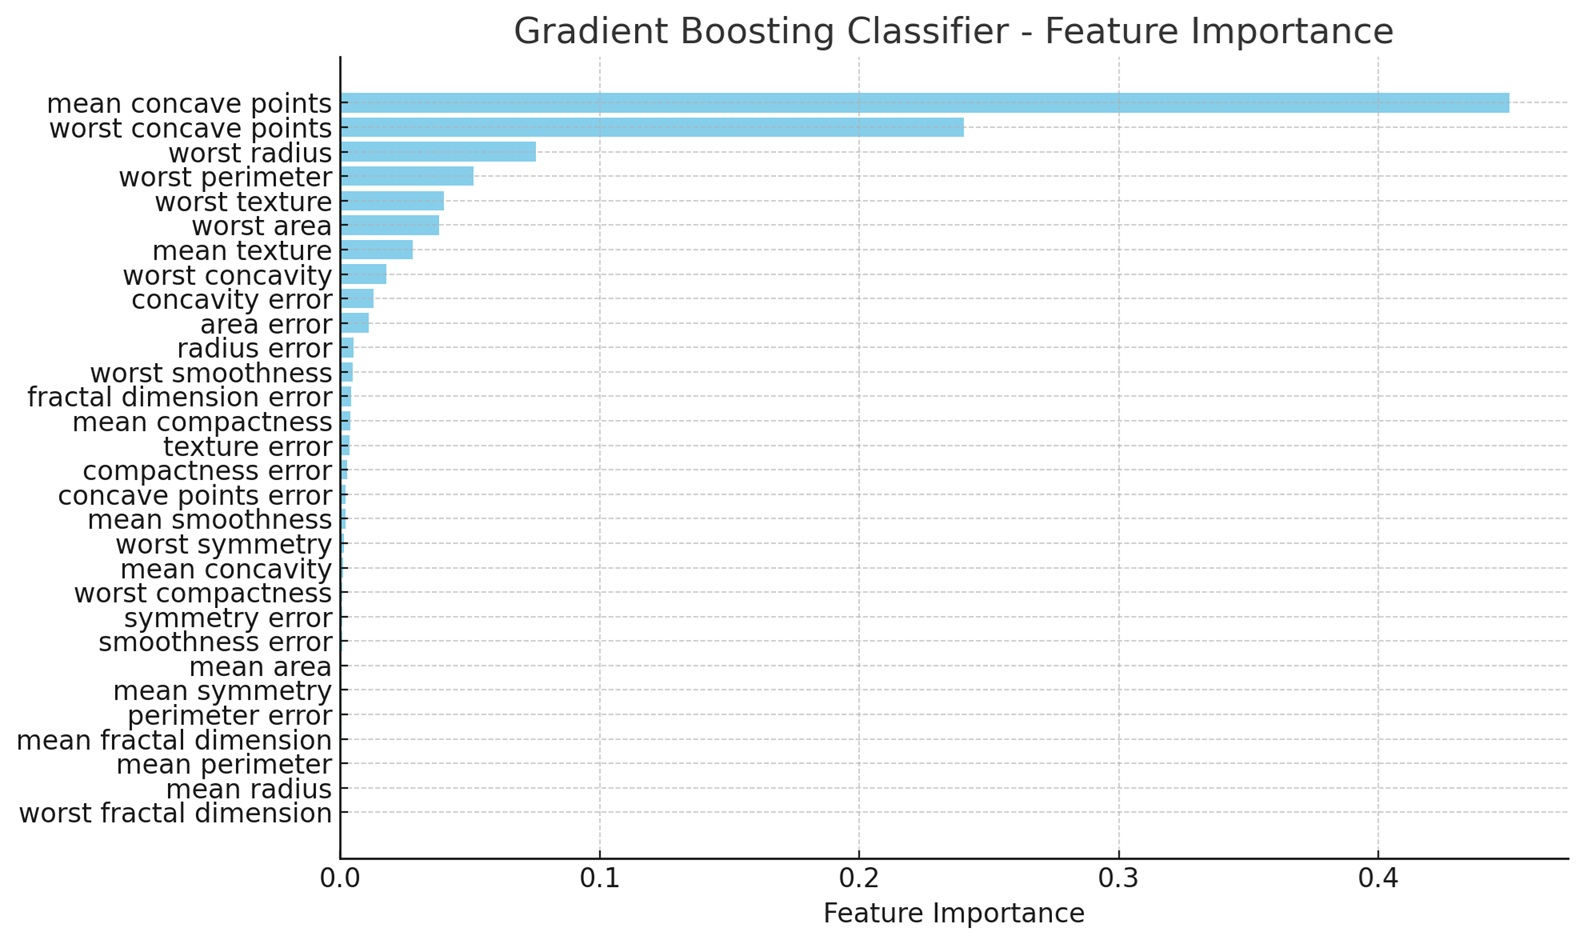

* The top 3 most important features used by the Gradient Boosting Classifier on the Breast Cancer dataset are:
  * mean concave points (importance: 0.450)
  * worst concave points (importance: 0.240)
  * worst radius (importance: 0.075)

##Q 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
**Ans** -

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

**Explanation**
* make_regression: Generates a synthetic dataset for regression.
* train_test_split: Splits the data into training and testing parts.
* GradientBoostingRegressor: The boosting model.
* fit(): Trains the model.
* predict(): Predicts outcomes for test data.
* r2_score(): Measures how well the predictions approximate the actual data (1 is perfect).

##Q 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
acc_gbc = accuracy_score(y_test, y_pred_gbc)

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"Gradient Boosting Classifier Accuracy: {acc_gbc:.4f}")
print(f"XGBoost Classifier Accuracy: {acc_xgb:.4f}")

**Explanation**
* make_classification: Generates a synthetic binary classification dataset.
* GradientBoostingClassifier: Standard scikit-learn gradient boosting model.
* XGBClassifier: XGBoost's optimized gradient boosting classifier.
* accuracy_score(): Measures prediction accuracy.
* use_label_encoder=False, eval_metric='logloss': Required for newer XGBoost versions to avoid warnings.

##Q 19. Train a CatBoost Classifier and evaluate using F1-Score.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cbc = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
cbc.fit(X_train, y_train)

y_pred = cbc.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

**Explanation**
* make_classification: Creates synthetic classification data.
* CatBoostClassifier: CatBoost's gradient boosting classifier.
* fit(): Trains the model.
* predict(): Predicts outcomes for test data.
* f1_score(): Computes the harmonic mean of precision and recall.

##Q 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [ ]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

**Explanation**
* make_regression: Generates synthetic data for regression.
* XGBRegressor: XGBoost's regression model.
* fit(): Trains the model.
* predict(): Predicts values for test data.
* mean_squared_error(): Measures the average squared difference between actual and predicted values.



##Q 21. Train an AdaBoost Classifier and visualize feature importance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
ada_clf.fit(X_train, y_train)

importances = ada_clf.feature_importances_

plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances, color='skyblue')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('AdaBoost Classifier Feature Importances')
plt.xticks(np.arange(len(importances)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Explanation**
* make_classification: Creates a synthetic binary classification dataset.
* AdaBoostClassifier: Boosting model using weak learners (decision stumps here).
* feature_importances_: Attribute of the trained model that indicates how important each feature is.
* matplotlib: For plotting feature importance.

##Q 22. Train a Gradient Boosting Regressor and plot learning curves.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    gbr, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curves: Gradient Boosting Regressor')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Explanation**
* make_regression: Generates synthetic regression data.
* GradientBoostingRegressor: The regressor we're evaluating.
* learning_curve(): Computes training and cross-validation scores for increasing training set sizes.
* train_sizes: Array of training set sizes.
* train_scores & test_scores: Arrays of R² scores for each training size split.
* matplotlib: For plotting the learning curves.

##Q 23. Train an XGBoost Classifier and visualize feature importance

In [ ]:
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

plt.figure(figsize=(8, 5))
plot_importance(xgb_clf, importance_type='gain', max_num_features=10, height=0.5)
plt.title('XGBoost Classifier Feature Importances (by Gain)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Explanation**
* make_classification: Creates synthetic binary classification data.
* XGBClassifier: The classifier we're training.
* plot_importance(): XGBoost’s built-in method to plot feature importances.
* importance_type='gain': Measures the average gain across all splits where a feature is used (can also use 'weight', 'cover').
* max_num_features: Limits the number of features displayed.
* matplotlib: For plotting.

##Q 24. Train a CatBoost Classifier and plot the confusion matrix.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cbc = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
cbc.fit(X_train, y_train)

y_pred = cbc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CatBoost Classifier Confusion Matrix')
plt.show()

**Explanation**
* make_classification: Generates synthetic binary classification data.
* CatBoostClassifier: The model we're training.
* confusion_matrix(): Computes the confusion matrix.
* seaborn heatmap: Makes it look nice and clean.
* xticklabels/yticklabels: Label axes for clarity.

##Q 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_range = [10, 50, 100, 200, 300]
accuracies = []

for n_estimators in n_estimators_range:
    ada_clf = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_estimators,
        learning_rate=0.5,
        random_state=42
    )
    ada_clf.fit(X_train, y_train)
    y_pred = ada_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{n_estimators} Estimators — Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='purple')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Classifier Accuracy vs Number of Estimators')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Explanation**
* make_classification: Generates synthetic data.
* AdaBoostClassifier: The boosting model, with DecisionTreeClassifier as a weak learner.
* accuracy_score(): Measures prediction accuracy.
* for loop: Trains and evaluates the model for different numbers of estimators.
* matplotlib: Plots accuracy vs number of estimators.

##Q 26. Train a Gradient Boosting Classifier and visualize the ROC curve.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

y_probs = gb_clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Explanation**
* make_classification: Creates synthetic binary classification data.
* GradientBoostingClassifier: Our boosting model.
* predict_proba()[:, 1]: Probabilities for the positive class.
* roc_curve(): Computes the False Positive Rate and True Positive Rate.
* auc(): Computes the Area Under the Curve (AUC).
* matplotlib: Plots the ROC curve.

##Q 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [ ]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg = XGBRegressor(n_estimators=100, max_depth=3, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(f"Best Learning Rate: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set MSE: {mse:.4f}")

**Explanation**
* make_regression: Generates synthetic regression data.
* XGBRegressor: The regressor we’re tuning.
* param_grid: A dictionary of learning rates to test.
* GridSearchCV: Performs cross-validated grid search over the learning rates.
* neg_mean_squared_error: Scoring metric (note: GridSearchCV minimizes it, hence the negative sign).
* best_estimator_: Retrieves the best model from grid search.
* mean_squared_error(): Evaluates final test set performance.

##Q 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, weights=[0.9, 0.1],
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_no_weights = CatBoostClassifier(iterations=200, learning_rate=0.1, verbose=0, random_seed=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

print("Without Class Weights:")
print(classification_report(y_test, y_pred_no_weights, digits=4))

class_weights = [1, 9]
model_with_weights = CatBoostClassifier(iterations=200, learning_rate=0.1, verbose=0,
                                        class_weights=class_weights, random_seed=42)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

print("With Class Weights:")
print(classification_report(y_test, y_pred_with_weights, digits=4))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_no_weights, ax=axes[0], colorbar=False)
axes[0].set_title("Without Class Weights")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_with_weights, ax=axes[1], colorbar=False)
axes[1].set_title("With Class Weights")

plt.tight_layout()
plt.show()

##Q 29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 2.0]
train_accuracies = []
test_accuracies = []

for lr in learning_rates:
    ada = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        learning_rate=lr,
        random_state=42
    )
    ada.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, ada.predict(X_train))
    test_acc = accuracy_score(y_test, ada.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Learning Rate: {lr} — Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(learning_rates, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('AdaBoost Classifier — Effect of Learning Rate')
plt.xscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

**Explanation**
* make_classification: Generates synthetic data.
* AdaBoostClassifier: Boosts decision stumps (max_depth=1 trees) with varying learning rates.
* learning_rates: We test a range from 0.01 to 2.0.
* accuracy_score: Evaluates both training and test accuracy.
* plt.plot(): Visualizes the effect of learning rate on model performance.

##Q 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np

X, y = make_classification(n_samples=1500, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=3, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_clf = XGBClassifier(objective='multi:softprob', num_class=3,
                        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred_proba = xgb_clf.predict_proba(X_test)

loss = log_loss(y_test, y_pred_proba)
print(f"Multi-class Log-Loss: {loss:.4f}")

**Explanation**
* make_classification: Creates synthetic multi-class data.
* XGBClassifier:
  * objective='multi:softprob' → returns class probabilities.
  * num_class=3 → tells XGBoost how many classes to expect.
* predict_proba(): Gets predicted class probabilities.
* log_loss(): Measures how well the predicted probabilities match the true labels.